In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mat
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [77]:
#Read dataset
df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [78]:
#Check sample data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AE9F290B8>,
      dtype=object)

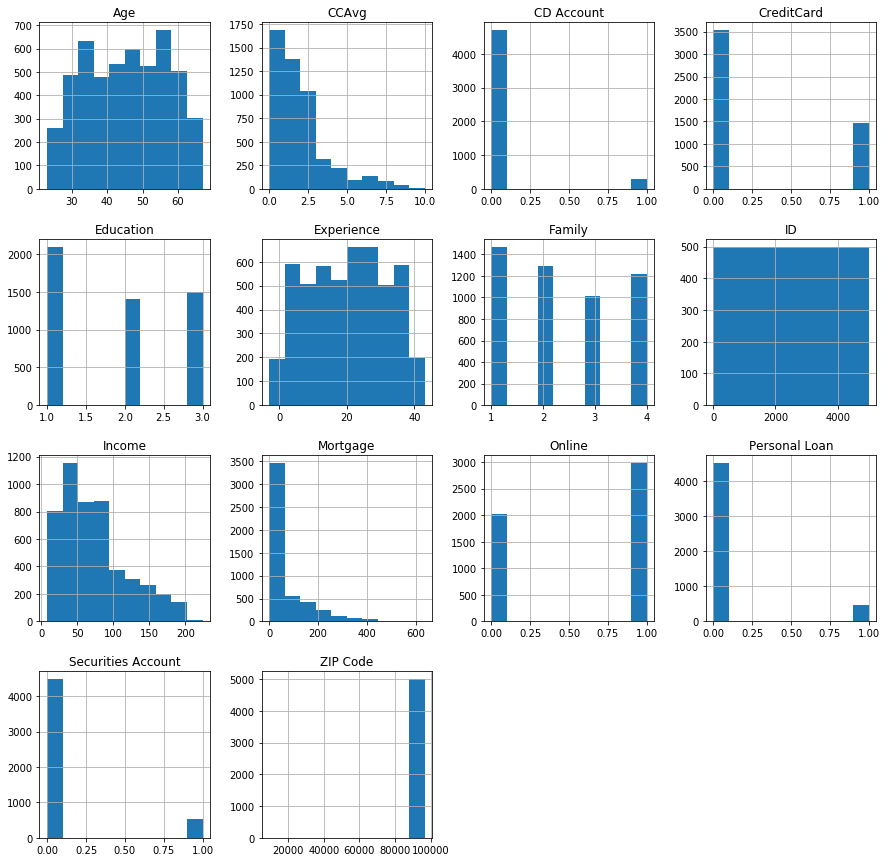

In [79]:
# Check distribution of all the columns
#for col in ("Age","CCAvg","CD Account","CreditCard","Education","Experience","Family","Income","Mortgage","Online","Personal Loan","Securities Account","ZIP Code"):
df.hist(figsize=(15,15))
plt.show()

In [80]:
# Findings from the distribution
# Age is normally distributed
# Income seems to have a bit of outliers. Need to check the box plots
# Experience seems to be normally distributed
# CCAvg spending seems to be inline with the Income
# Customers having a CD account only are only a few
# Customers having Securities account are High
# Need to identify a Liability customer who has a Security Account or a Deposit Account or both. 
# Customers having credit card only are not considered Liability account holders

In [81]:
#Identify a liability customer - If the customer has only Credit Card account but no Securities or CD accounts, 
# that account is NOT a liability account. Flag is being set to identify a liability customer
df["Liability Customer"]=np.where(np.logical_and((df["CreditCard"]==1),((df["Securities Account"]+df["CD Account"])==0)),0,1)

In [82]:
df.shape
df.dtypes

(5000, 15)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Liability Customer      int32
dtype: object

In [83]:
# Take only the Liability customers into a dataframe
df_liab=df.loc[df['Liability Customer'] == 1]


In [84]:
# Check for the shape
df_liab.shape

(3815, 15)

In [85]:
# Check correlation between variables and drop the attributes that don't have any impact on identifying a customer who takes Personal Loan
df_liab.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Liability Customer
ID,1.000000,-0.005181,-0.005890,-0.017795,-0.000542,-0.020574,-0.030482,0.020298,-0.016243,-0.029669,-0.016893,-0.005835,0.002379,0.012635,NaN
Age,-0.005181,1.000000,0.994134,-0.053385,-0.016261,-0.046960,-0.055601,0.039791,-0.010509,-0.006987,0.000466,0.010035,0.010337,0.008848,NaN
Experience,-0.005890,0.994134,1.000000,-0.045210,-0.016578,-0.052209,-0.053682,0.011930,-0.008105,-0.006568,-0.000372,0.012768,0.011165,0.010958,NaN
Income,-0.017795,-0.053385,-0.045210,1.000000,-0.023784,-0.144514,0.645032,-0.174333,0.223219,0.535885,-0.016387,0.182410,0.029677,0.113123,NaN
ZIP Code,-0.000542,-0.016261,-0.016578,-0.023784,1.000000,0.020475,-0.006018,-0.005430,0.003535,-0.007347,0.006071,0.027357,0.027202,0.025555,NaN
Family,-0.020574,-0.046960,-0.052209,-0.144514,0.020475,1.000000,-0.100588,0.070720,-0.024529,0.063510,0.024430,0.017138,0.011918,0.016456,NaN
CCAvg,-0.030482,-0.055601,-0.053682,0.645032,-0.006018,-0.100588,1.000000,-0.123894,0.115050,0.379669,0.005926,0.146143,0.012877,0.084876,NaN
Education,0.020298,0.039791,0.011930,-0.174333,-0.005430,0.070720,-0.123894,1.000000,-0.035791,0.147094,-0.017208,0.012731,0.005276,0.015617,NaN
Mortgage,-0.016243,-0.010509,-0.008105,0.223219,0.003535,-0.024529,0.115050,-0.035791,1.000000,0.148168,-0.014304,0.093543,0.008934,0.056816,NaN
Personal Loan,-0.029669,-0.006987,-0.006568,0.535885,-0.007347,0.063510,0.379669,0.147094,0.148168,1.000000,0.002807,0.325299,0.048986,0.191921,NaN


In [86]:
# Take only the attributes that have a decent correlation into a Data Frame
df_new=df_liab.loc[:,["Income","Family","CCAvg","Education","Mortgage","Personal Loan","CD Account","Securities Account"]]

In [87]:
df_new.shape

(3815, 8)

In [88]:
df_new.corr()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,Securities Account
Income,1.000000,-0.144514,0.645032,-0.174333,0.223219,0.535885,0.182410,-0.016387
Family,-0.144514,1.000000,-0.100588,0.070720,-0.024529,0.063510,0.017138,0.024430
CCAvg,0.645032,-0.100588,1.000000,-0.123894,0.115050,0.379669,0.146143,0.005926
Education,-0.174333,0.070720,-0.123894,1.000000,-0.035791,0.147094,0.012731,-0.017208
Mortgage,0.223219,-0.024529,0.115050,-0.035791,1.000000,0.148168,0.093543,-0.014304
Personal Loan,0.535885,0.063510,0.379669,0.147094,0.148168,1.000000,0.325299,0.002807
CD Account,0.182410,0.017138,0.146143,0.012731,0.093543,0.325299,1.000000,0.298542
Securities Account,-0.016387,0.024430,0.005926,-0.017208,-0.014304,0.002807,0.298542,1.000000


C:\Users\kalya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kalya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kalya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kalya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


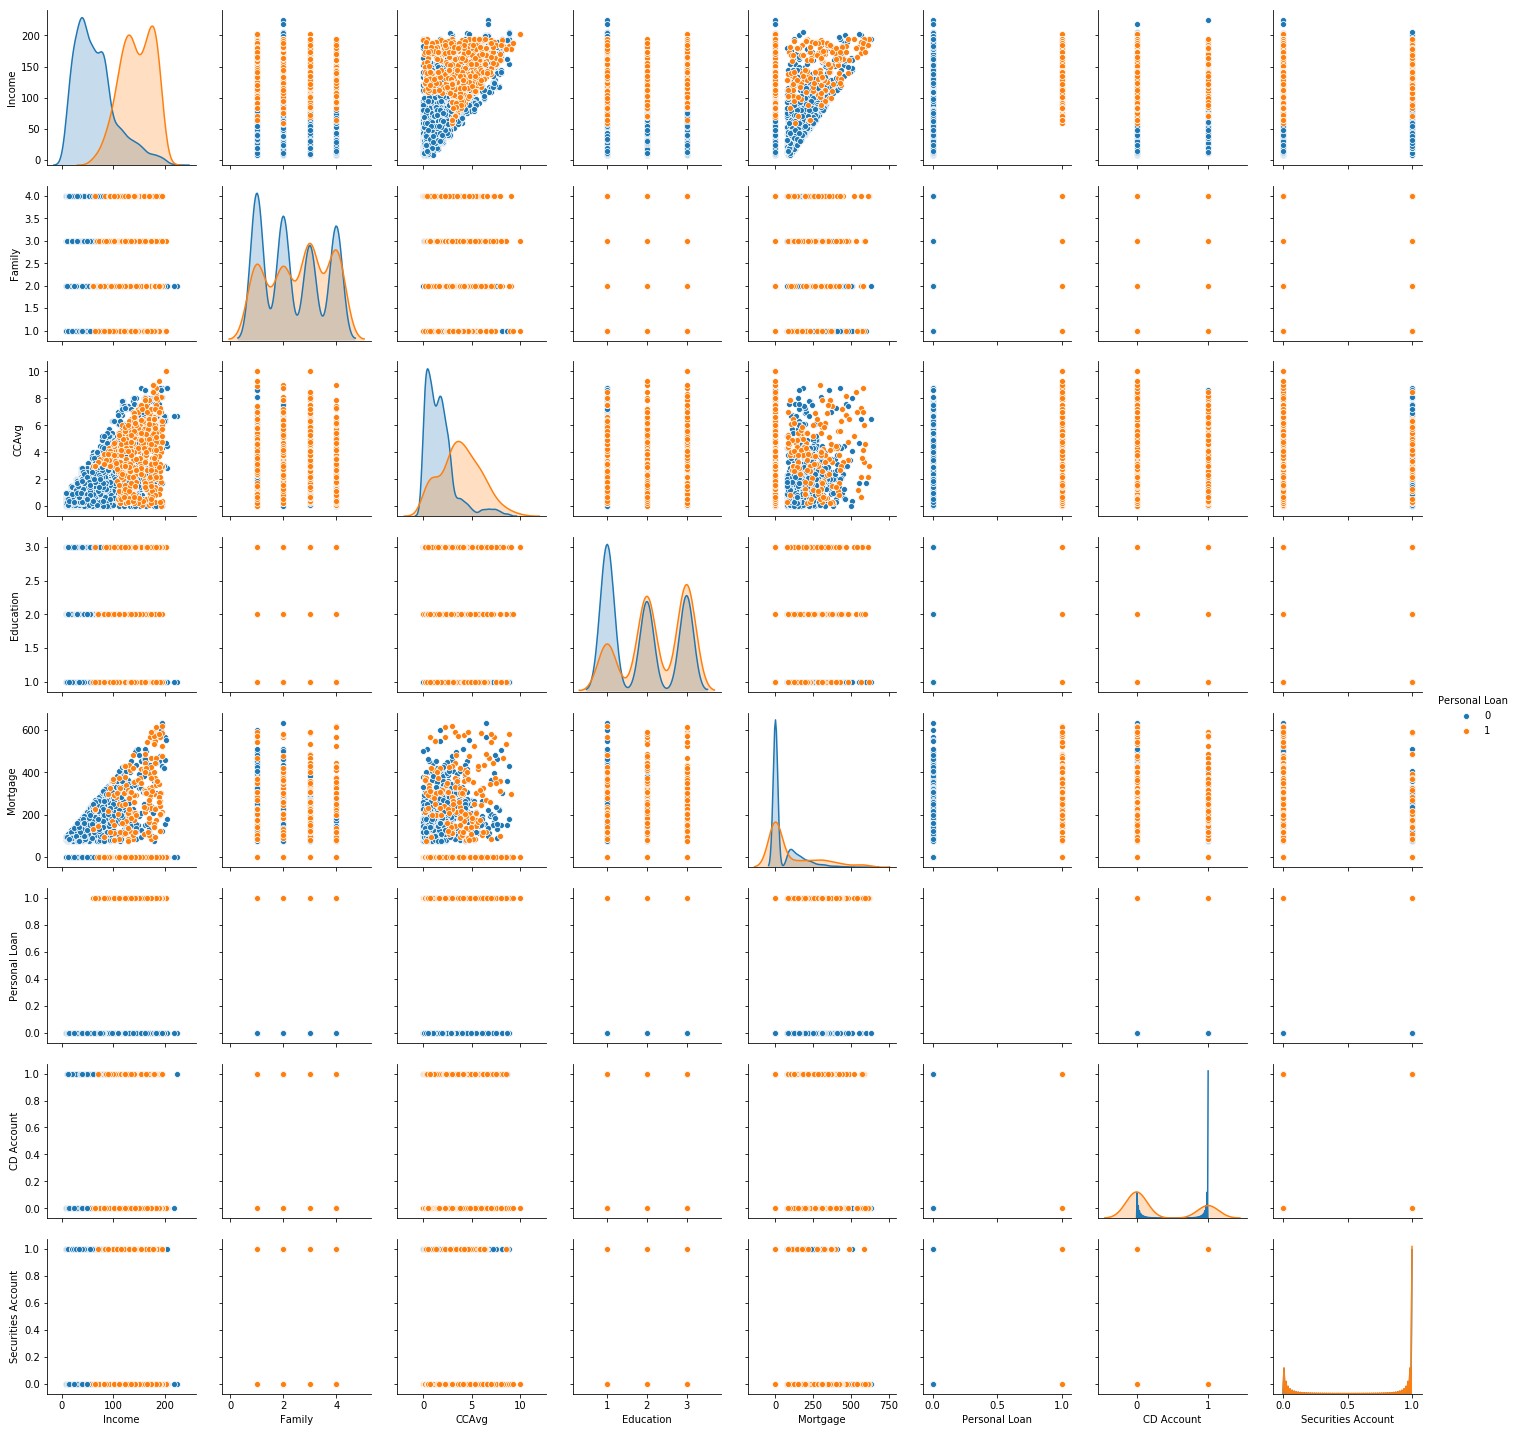

In [89]:
sns.pairplot(df_new,hue="Personal Loan",diag_kind="kde")

# It appears that education levels 2 and 3 have very good chances of getting a personal loan. 
# Splitting the Data Frame into two one with Education level as 1 and the other with levels 2 and 3

In [90]:
df_liab_edu_1=df_new.loc[df_new['Education'] == 1]

In [91]:
df_liab_edu_2_3=df_new.loc[df_new['Education'] != 1]

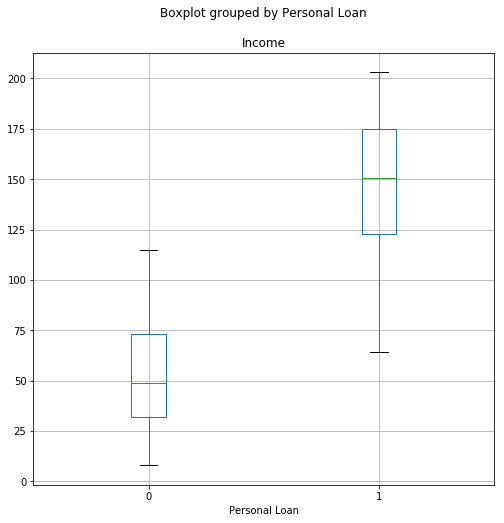

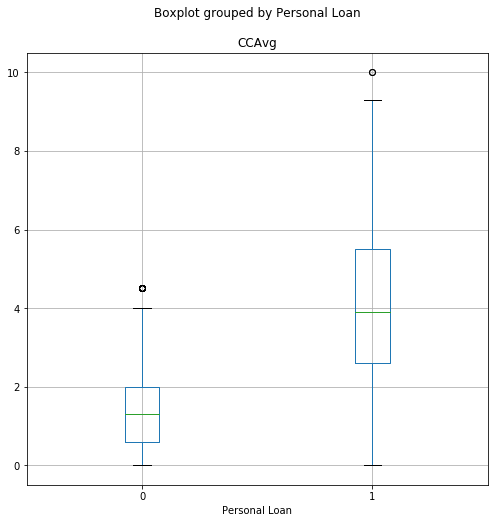

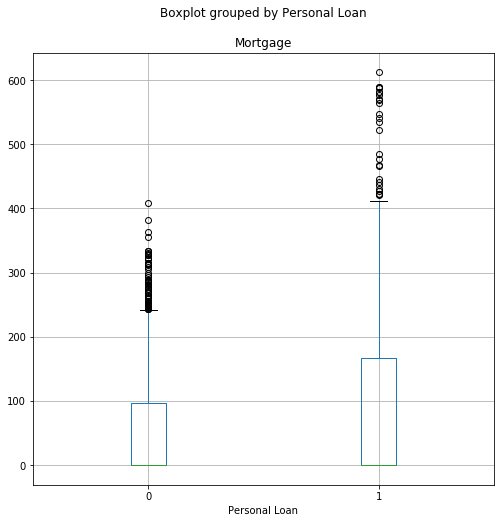

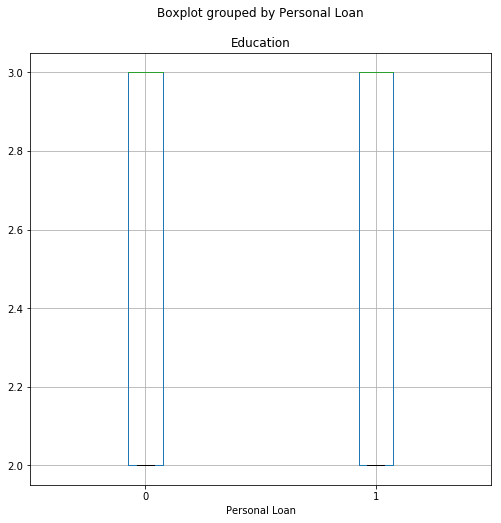

In [92]:
# Check for any outliers for potential Personal Loan customers -- Doesn't have too many
for col in ("Income","CCAvg","Mortgage","Education"):
    df_liab_edu_2_3.boxplot(col,by="Personal Loan",figsize=(8,8))
    plt.show()

In [93]:
# Get all the independent variables into X
X_1=df_liab_edu_1.loc[:,["Income","Family","CCAvg","Education","Mortgage","CD Account","Securities Account"]]
X_2=df_liab_edu_2_3.loc[:,["Income","Family","CCAvg","Education","Mortgage","CD Account","Securities Account"]]

In [94]:
# Get the Dependent variable Personal Loan into y
y_1=df_liab_edu_1.loc[:,["Personal Loan"]]
y_2=df_liab_edu_2_3.loc[:,["Personal Loan"]]

In [95]:
# Split the dataset into Train and Test
train_set_1, test_set_1, train_labels_1, test_labels_1 = train_test_split(X_1, y_1, test_size=0.30, random_state=1)
train_set_2, test_set_2, train_labels_2, test_labels_2 = train_test_split(X_2, y_2, test_size=0.30, random_state=1)

Logistic Regression

In [96]:
# Train model using Logistic Regression Model for Education Level 1
model = LogisticRegression(solver='lbfgs' , max_iter=5000 , multi_class='multinomial')
model.fit(train_set_1, train_labels_1)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
# Check performance on test data - 96.7%
model.score(train_set_1 , train_labels_1)      # performance on test data

0.9673617407071623

In [98]:
# Predict using Logistic Regression on the test data for education level 1 and print the Confusion matrix
test_pred = model.predict(test_set_1)

print(metrics.classification_report(test_labels_1, test_pred))
print(metrics.confusion_matrix(test_labels_1, test_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       444
          1       1.00      0.41      0.59        29

avg / total       0.97      0.96      0.96       473

[[444   0]
 [ 17  12]]


# Logistic Regression was able to predict the customers going to go for Personal Loan by 41% for Education Level 1 Data Set. 

# This is indicated by the recall percentage for the value 1

In [99]:
# Train model using Logistic Regression Model for Education Levels 2 and 3 and print the Confusion matrix
model.fit(train_set_2, train_labels_2)
model.score(train_set_2 , train_labels_2) 
test_pred = model.predict(test_set_2)

print(metrics.classification_report(test_labels_2, test_pred))
print(metrics.confusion_matrix(test_labels_2, test_pred))

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.97702616464582

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       572
          1       0.99      0.90      0.94       100

avg / total       0.98      0.98      0.98       672

[[571   1]
 [ 10  90]]


# Logistic Regression was able to predict the customers going to go for Personal Loan by 90% for Education Levels 2 and 3 Data Set. 

# This is indicated by the recall percentage for the value 1

Naives Bayes 

In [100]:
# Invoking Naives Bayesian algorithm
nbcl= GaussianNB()

In [101]:
# Train model using Naves Bayes Model for Education Level 1
nbcl.fit(train_set_1, train_labels_1)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [102]:
# Predict using Naives Bayes on the test data for education level 1 and print the Confusion matrix
test_pred = nbcl.predict(test_set_1)

print(metrics.classification_report(test_labels_1, test_pred))
print(metrics.confusion_matrix(test_labels_1, test_pred))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95       444
          1       0.34      0.45      0.39        29

avg / total       0.93      0.91      0.92       473

[[419  25]
 [ 16  13]]


# Naives bayes was able to predict the customers going to go for Personal Loan by 45% for Education Level 1 Data Set. 

# This is indicated by the recall percentage for the value 1

In [103]:
# Train model using Naves Bayes Model for Education Levels 2 and 3 and print the confusion matrix
nbcl.fit(train_set_2, train_labels_2)
test_pred = nbcl.predict(test_set_2)

print(metrics.classification_report(test_labels_2, test_pred))
print(metrics.confusion_matrix(test_labels_2, test_pred))

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

             precision    recall  f1-score   support

          0       0.97      0.96      0.96       572
          1       0.77      0.84      0.80       100

avg / total       0.94      0.94      0.94       672

[[547  25]
 [ 16  84]]


# Naives Bayes was able to predict the customers going to go for Personal Loan by 84% for Education Levels 2 and 3 Data Set. 

# This is indicated by the recall percentage for the value 1

Decission Tree

In [104]:
# Invoking Decission Tree algorithm
dtcl=DecisionTreeClassifier(criterion="entropy",max_depth=2)

In [105]:
# Train model using Decision Trees Model for education level 1
dtcl.fit(train_set_1, train_labels_1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
# Predict using Decision Tree on the test data for education level 1 and print the Confusion matrix
test_pred = dtcl.predict(test_set_1)

print(metrics.classification_report(test_labels_1, test_pred))
print(metrics.confusion_matrix(test_labels_1, test_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       444
          1       0.84      0.93      0.89        29

avg / total       0.99      0.99      0.99       473

[[439   5]
 [  2  27]]


# Decission Tree was able to predict the customers going to go for Personal Loan by 93% for Education Level 1 Data Set. 

# This is indicated by the recall percentage for the value 1

In [107]:
# Train model using Decision Trees Model for education levels 2 and 3 and print the confusion matrix
dtcl.fit(train_set_2, train_labels_2)
test_pred = dtcl.predict(test_set_2)

print(metrics.classification_report(test_labels_2, test_pred))
print(metrics.confusion_matrix(test_labels_2, test_pred))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       572
          1       1.00      0.84      0.91       100

avg / total       0.98      0.98      0.98       672

[[572   0]
 [ 16  84]]


# Decission Tree was able to predict the customers going to go for Personal Loan by 84% for Education Levels 2 and 3 Data Set. 

# This is indicated by the recall percentage for the value 1

In [108]:
# By far Decision Tree performed far better when compared to the other two classifiers at an average. 

Conclusion:
    
Logistic Regression: 
    
    It was able to predict 90% accurately for education levels 2 and 3 which have the most chances of getting a loan. 
    For education level 1 the accuracy was 41%
    
Naives Bayes: 
    
    It was able to predict 84% accurately for education levels 2 and 3 which have the most chances of getting a loan. 
    For education level 1 the accuracy was 45%
    
Decision Tree: 
    
    It was able to predict 84% accurately for education levels 2 and 3 which have the most chances of getting a loan. 
    For education level 1 the accuracy was 93%
    
Final conclusion: It's best to use Decision tree for Education level 1 and Logictic Regression for Education Levels 2 and 3 Data sets